In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import math as m
from scipy.optimize import fsolve

## Question 1 Lagrange points

In [17]:
"""
Q1
"""
m_sun = 1.989e30
m_jup = 1.898e27
m_europa = 4.799e22
m_apophis = 2.699e10
d_sun_apophis = 149e6 #km
d_sun_jup = 750e6 #km
d_jup_europa = 670e3 #km

#a) compute and plot position of 5 lagrange points for sun-jup system
# m_sun + m_jup = 1
# mu = m_jup/(m_sun + m_jup)
mu_a = m_jup/(m_sun + m_jup)
x = symbols("x")
eqL1 = Eq(x - (1-mu_a)/(mu_a + x)**2 + mu_a/(x-1+mu_a)**2, 0)
l1x_a = solve(eqL1,x)[0]
eqL2 = Eq(x - (1-mu_a)/(mu_a + x)**2 - mu_a/(x-1+mu_a)**2, 0)
l2x_a = solve(eqL2,x)[0]
print(l2x_a)
eqL3 = Eq(x + (1-mu_a)/(mu_a + x)**2 + mu_a/(x-1+mu_a)**2, 0)
l3x_a = solve(eqL3,x)[0]
l4x_a = 1/2-mu_a
l4y_a = np.sqrt(3)/2
l5x_a = 1/2-mu_a
l5y_a = -np.sqrt(3)/2

1.06881768125576


Sun-Jup L1: 0.932378336865411
Sun-Jup L2: 1.06881768125576
Sun-Jup L3: -1.00039722438795
Sun-Jup L4 x: 0.49904666135583037
Sun-Jup L4 y: 0.8660254037844386
Sun-Jup L5 x: 0.49904666135583037
Sun-Jup L5 y: -0.8660254037844386


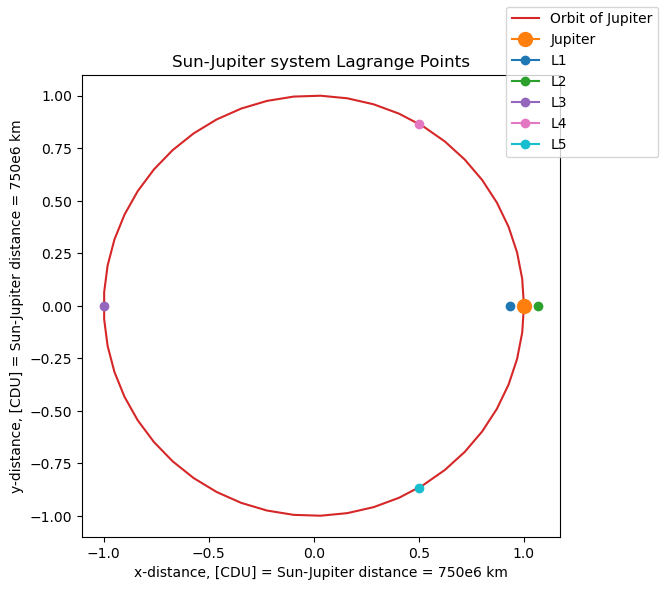

In [44]:
au = 1.496e+8
print(f"Sun-Jup L1: {l1x_a}")
print(f"Sun-Jup L2: {l2x_a}")
print(f"Sun-Jup L3: {l3x_a}")
print(f"Sun-Jup L4 x: {l4x_a}")
print(f"Sun-Jup L4 y: {l4y_a}")
print(f"Sun-Jup L5 x: {l5x_a}")
print(f"Sun-Jup L5 y: {l5y_a}")

theta = np.linspace(0, 2.*np.pi, 50)
x_a = np.cos(theta)
y_a = np.sin(theta)

fig = plt.figure(figsize=(7, 6))
ax = fig.gca()
ax.plot(x_a,y_a, label = "Orbit of Jupiter", color = "tab:red")
ax.plot(1, 0, label = "Jupiter", marker="o", markersize = "10", color = "tab:orange")
ax.plot(l1x_a, 0, label = "L1", marker="o")
ax.plot(l2x_a, 0, label = "L2", marker="o", color = "tab:green")
ax.plot(l3x_a, 0, label = "L3", marker="o", color = "tab:purple")
ax.plot(l4x_a, l4y_a, label = "L4", marker="o", color = "tab:pink")
ax.plot(l5x_a, l5y_a, label = "L5", marker="o", color = "tab:cyan")
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("x-distance, [CDU] = Sun-Jupiter distance = 750e6 km")
ax.set_ylabel("y-distance, [CDU] = Sun-Jupiter distance = 750e6 km")
ax.set_title("Sun-Jupiter system Lagrange Points")
fig.legend()
plt.savefig("hw3_1a.jpg", dpi = 300, bbox_inches="tight")

In [45]:
#1b: Jupiter-Europa
#distance wrt Europa
mu_b = m_europa/(m_europa + m_jup)
eqL1_b = Eq(x - (1-mu_b)/(mu_b + x)**2 + mu_b/(x-1+mu_b)**2, 0)
l1_b = solve(eqL1_b,x)[0]
print(l1_b)
l1_b = d_jup_europa*(1-l1_b)

eqL2_b = Eq(x - (1-mu_b)/(mu_b + x)**2 - mu_b/(x-1+mu_b)**2, 0)
l2_b = solve(eqL2_b,x)[0]
print(l2_b)
l2_b = d_jup_europa*(l2_b-1)

print(f"Jup-Europa L1: {l1_b}")
print(f"Jup-Europa L2: {l2_b}")

0.979763122950906
1.02046238712899
Jup-Europa L1: 13558.7076228930
Jup-Europa L2: 13709.7993764265


In [46]:
#1c: Sun-Apophis
mu_c = m_apophis/(m_sun + m_apophis)
eqL1_c = Eq(x - (1-mu_c)/(mu_c + x)**2 + mu_c/(x-1+mu_c)**2, 0)
l1_c = solve(eqL1_c,x)[0]
l1_c = d_sun_apophis*(1-l1_c)
print(f"Sun-Apophis L1: {l1_c}")

Sun-Apophis L1: 24.6415786152587


## Question 2: Lambert problem

In [82]:
#change alpha and beta based off time of flight (only thing with sine was tP)
#from May 1, 2024 to June 15, 2025
#ToF = 410 days
e_x =-1.152298994309664E+08
e_y =-9.900155838813813E+07
e_z = 3.696167672807723E+04
a_x = -7.850925799584286E+07 
a_y = 1.374546686621155E+08 
a_z =-9.195926177911177E+06

au = 1.496e+8 #km
r_earth_vec = np.array([e_x/au,e_y/au,e_z/au])
r_earth = np.linalg.norm(r_earth_vec)
print(f"radius earth: {r_earth}")

r_apophis_vec = np.array([a_x/au,a_y/au,a_z/au])
r_apophis = np.linalg.norm(r_apophis_vec)
print(f"radius apophis: {r_apophis}")

chord_vec = r_apophis_vec - r_earth_vec
c = np.linalg.norm(chord_vec)
print(f"chord: {c}")

s = (r_earth + r_apophis + c)/2
print(f"semiperimeter: {s}")

a_m = semi/2
print(f"min_semimajor axis: {a_m}")

#dot product: v1 dot v2 = |v1| |v2| cos(theta)
theta = 2*np.pi - np.arccos(np.dot(r_earth_vec, r_apophis_vec)/(r_earth*r_apophis)) #due to lengthy time of flight this is probably the right way
print(f"theta: {theta}")
#how do you check the angular momentum vector when r and v are unknown?

mu = 1. #distance units and time units
#time unit: at that distance unit, conbverting orbital unit at distance/2pi
#earth orbital period in days
tu = 365.24/(2*np.pi) #in days for easy conversion
#1 tu = 365.25/(2*np.pi) days

# t_p = np.sqrt(2)/(3*np.sqrt(mu))* (s**(3/2) - m.copysign(1, np.sin(theta))*(s-c)**(3/2))
# print(f"min_TOF: {t_p}")
beta_0 = 2*np.arcsin(np.sqrt((s-c)/(2*a_m)))
beta_m = -beta_0 #since theta > pi

#find min semimajor axis transfer time t_m, NOT t_p min possible transfer time
t_m = np.sqrt(s**3/(8*mu)) * (np.pi-beta_m + np.sin(beta_m))
print(f"min_semimajor_axis_TOF: {t_m}")
#2.824 tu
print(t_m*tu)
#tf > t_m, upper branch. alpha = 2*np.pi - alpha_0
alpha_0 = 2*np.arcsin(np.sqrt(s/(2*a_m)))

t_des = 410/tu
def t_func(a):
    beta = -2*np.arcsin(np.sqrt((s-c)/(2*a)))
    alpha = 2*np.pi - 2*np.arcsin( (s/(2*a))**0.5 )
    t = t_des - (a**3/mu)**0.5 * (alpha - beta - (np.sin(alpha)-np.sin(beta)))
    return t
# uc = apo pos

radius earth: 1.0154981928761537
radius apophis: 1.059909510213292
chord: 1.60072577742366
semiperimeter: 1.838066740256553
min_semimajor axis: 0.9190333701282765
theta: 4.521855853377742
min_semimajor_axis_TOF: 2.824655120601464
164.19649999334186


In [105]:
a = fsolve(t_func,1.1)[0]
print(f"a_iterate: {a}")

r1_hat = r_earth_vec/r_earth #u1 = r1_hat = i_hat
print(f"r1_unit vec: {r1_hat}")

r2_hat = r_apophis_vec/r_apophis
print(f"r2_unit vec: {r2_hat}")

#r2_hat = cos(theta) i + sin(theta) j
i_hat = r1_hat
j_hat = (r2_hat - np.cos(theta)*i_hat)/np.sin(theta)

gamma = np.arcsin(r_apophis*np.sin(theta)/c) #sine law

u_c = -np.cos(gamma)*i_hat + np.sin(gamma)*j_hat #i_hat needs to be aligned with earth orbit vectors
print(f"u_c: {u_c}")

alpha = 2*np.pi - 2*np.arcsin( (s/(2*a))**0.5 )
print(f"alpha: {alpha}")
beta = -2*np.arcsin(np.sqrt((s-c)/(2*a)))
print(f"beta: {beta}")

A = (mu/(4*a))**0.5 / np.tan(alpha/2)
print(f"A: {A}")

B = (mu/(4*a))**0.5 / np.tan(beta/2)
print(f"B: {B}")

v1 = (B+A)*u_c + (B-A)*r1_hat

print(f"v1, start of lambert problem (after burn): {v1}")

a_iterate: 1.237828760882293
r1_unit vec: [-7.58497990e-01 -6.51675333e-01  2.43299332e-04]
r2_unit vec: [-0.49513142  0.86688026 -0.05799561]
u_c: [ 0.15334221  0.98742069 -0.03855574]
alpha: 4.206126474817442
beta: -0.6296048231723853
A: -0.26468546684655686
B: -1.380111337455629
v1, start of lambert problem (after burn): [ 0.5938315  -0.89721087  0.06314497]


In [114]:
e_v_x = 1.897300201461335E+01 #km
e_v_y = -2.268665080580648E+01 #km
e_v_z = 5.966729305662000E-04 #km

#v1 = v_earth + dv1
v_earth = np.array([e_v_x, e_v_y, e_v_z])
v_earth_AU_TU = v_earth*(3600*24) #convert to days
v_earth_AU_TU = v_earth_AU_TU /au *tu
print(f"v_earth in AU/TU: {v_earth_AU_TU}")

dv1_vec = v1-v_earth_AU_TU
dv1 = np.linalg.norm(dv1_vec)
print(f"dv1 in km/s: {dv1*au/tu/(3600*24)}")

v_earth in AU/TU: [ 6.36966611e-01 -7.61642204e-01  2.00316605e-05]
dv1 in km/s: 4.636012963302502


## Question 3: Hohmann and Patched Conics of sun collision

In [2]:
#Q3
r1 = 149.6e6 #km
mu = 1.32712440018e11 #km**3/s**2
# au = 149.6e6 #km
r2 = 695700 #km
rE = 6378 #km
secInDay = 86400 #seconds in a day
mu_E = 398600 #km**3/s**2

aH = (r1+r2)/2 #remember a Hohmann goes from one side to the opposite side of the system; we are going to the far side of the sun
print(f"Q3.1 aH = {aH}")

vEarth = np.sqrt(mu/r1)
print(f"vEarth = {vEarth}")

vt_apoapsis = np.sqrt(mu*(2/r1 - 1/aH))
print(f"Hohmann apoapsis v (start of transfer ellipse): {vt_apoapsis}")

vt_periapsis = np.sqrt(mu*(2/r2 - 1/aH))
print(f"Hohmann periapsis v: {vt_periapsis}")

dvA = vt_apoapsis - vEarth #no need for dvB since you're now on a ballistic trajectory
dV = abs(dvA)
print(f"Q3.5 Hohmann Delta V: {dV}")

dT_hohmann = np.pi*np.sqrt(aH**3/mu) /secInDay
print(f"Q3.6 Hohmann transfer time: {dT_hohmann} days")




#positive excess velocity
#hyp excess velocity = deltaT

Q3.1 aH = 75147850.0
vEarth = 29.784479863882666
Hohmann apoapsis v (start of transfer ellipse): 2.8657793044372792
Hohmann periapsis v: 616.2434726804927
Q3.5 Hohmann Delta V: 26.918700559445387
Q3.6 Hohmann transfer time: 65.02122583248246 days


In [4]:
#patched conics

"""
12/6/23: from Earth to sun, v_inf is for earth exit burn
should be negative since you need to counteract Earth velocity in order to fall into sun?
"""
# v_inf = abs(vEarth - vt_apoapsis) #earth is still moving! 
v_inf = vt_apoapsis - vEarth #v_final - v_initial
#NOTE that dV_hoffmann equals hyperbolic excess
print(f"Hyperbolic excess velocity = {v_inf}")
r_circ = rE + 300
v_circ = np.sqrt(mu_E/r_circ)
print(f"300km parking orbit v = {v_circ}")
v_hyp = np.sqrt(2*mu_E/r_circ + v_inf**2)
print(f"v_hyp hyperbolic exit velocity periapsis = {v_hyp}")
dv = v_hyp - v_circ
print(f"dV circ to hyp = {dv}")

Hyperbolic excess velocity = -26.918700559445387
300km parking orbit v = 7.725835197559566
v_hyp hyperbolic exit velocity periapsis = 29.05156620233728
dV circ to hyp = 21.325731004777715


# Q4: Flyby time!

In [142]:
mu_e = 398600
mu_m = 42828.37
mu_j = 126686534
mu = 1.32712440018e11
au = 149.6e6 #km
r_e = 1.*au
r_m = 1.524*au
r_j = 5.2*au
R_e = 6378.137
R_m = 3396.2
R_j = 71491

v_m = np.sqrt(mu/r_m)
print(f"v_m = {v_m}")

aH_m = (r_e+r_m)/2
v2H_m = np.sqrt(mu*(2/r_m - 1/aH_m))
print(f"v2H_m = {v2H_m}")

v_inf_m = v_m - v2H_m
print(f"v_inf_m = {v_inf_m}")

altp_0 = 100 #km
rp_0_m = R_m + altp_0
delta_0_m = np.arcsin(1 / (1 + rp_0_m*v_inf_m**2/mu_m))
print(f"delta_0_m = {delta_0_m*180/np.pi}")

v_m = 24.126678484060946
v2H_m = 21.47671526265728
v_inf_m = 2.6499632214036666
delta_0_m = 39.466481093920706


In [143]:
v_j = np.sqrt(mu/r_j)
print(f"v_j = {v_j}")

aH_j = (r_e+r_j)/2
v2H_j = np.sqrt(mu*(2/r_j - 1/aH_j))
print(f"v2H_j apoapsis = {v2H_j}")

v_inf_j = v_j - v2H_j
print(f"v_inf_j = {v_inf_j}")

rp_0_j = R_j + 100
delta_0_j = np.arcsin(1 / (1 + rp_0_j*v_inf_j**2/mu_j))
print(f"delta_0_j = {delta_0_j*180/np.pi}")

v_j = 13.061358457753514
v2H_j apoapsis = 7.418353107424101
v_inf_j = 5.643005350329412
delta_0_j = 79.21100204725495


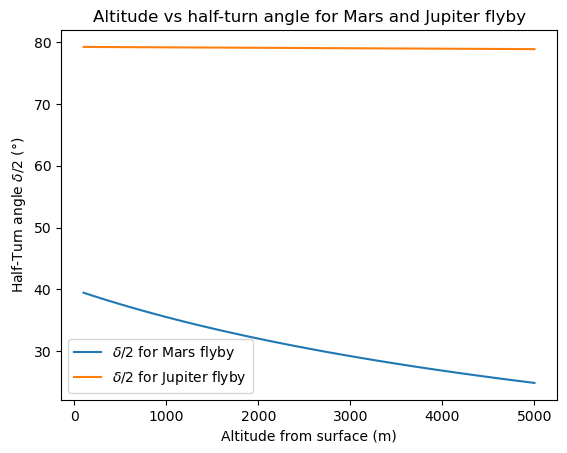

In [155]:
def half_turn(R,v_inf,mu_i):
    alt_arr = np.arange(100.,5100.,100.)
    delta_arr = []
    for alt in alt_arr:
        rp = R + alt
        delta = np.arcsin(1 / (1 + rp*v_inf**2/mu_i))
        delta_arr.append(delta*180/np.pi) #converting to degrees
        # delta_arr.append(delta)
    return delta_arr

delta_m = half_turn(R_m, v_inf_m, mu_m) #converting to degrees
delta_j = half_turn(R_j, v_inf_j, mu_j) #converting to degrees

alt_arr = np.arange(100.,5100.,100.)
plt.plot(alt_arr,delta_m,label = "$\delta/2$ for Mars flyby")
plt.plot(alt_arr,delta_j,label = "$\delta/2$ for Jupiter flyby")
plt.xlabel("Altitude from surface (m)")
plt.ylabel("Half-Turn angle $\delta/2$ ($\degree$)")
plt.title("Altitude vs half-turn angle for Mars and Jupiter flyby")
plt.legend()
plt.savefig("hw3_4.jpg", dpi = 300, bbox_inches="tight")